<a href="https://colab.research.google.com/github/Umadevi-RK/AIML_AS/blob/main/2313157_Umadevi_AS_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read data
df= pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
# To identify Null Values & it's count
df.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [42]:
# Discriptive statistics
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [41]:
# descriptive Stat. including Categorical Variable
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [7]:
# Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [47]:
# Column Index
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [48]:
print("Row & Column")
df.shape

Row & Column


(50, 5)

In [49]:
# Unquie value
df.nunique()

,0
R&D Spend,49
Administration,50
Marketing Spend,48
State,3
Profit,50


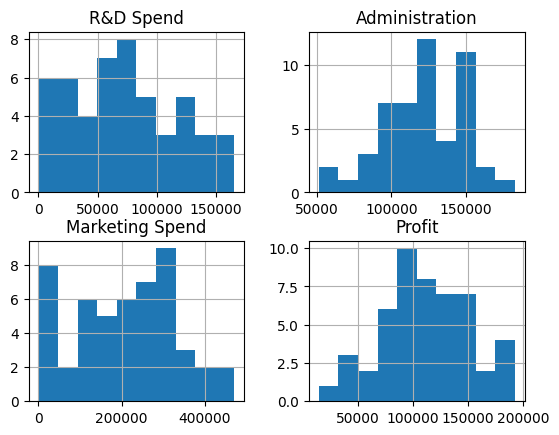

In [ ]:
# Histogram
df.hist()
plt.show()

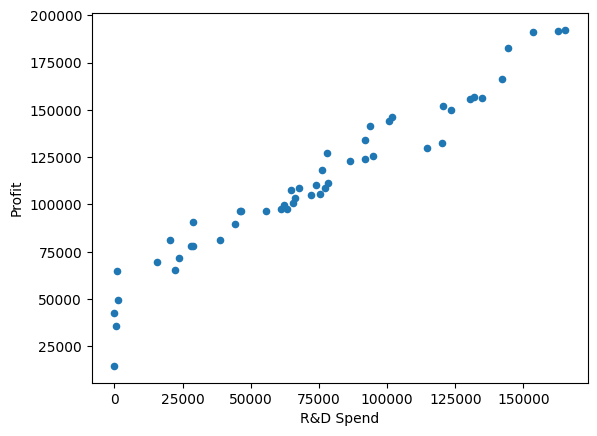

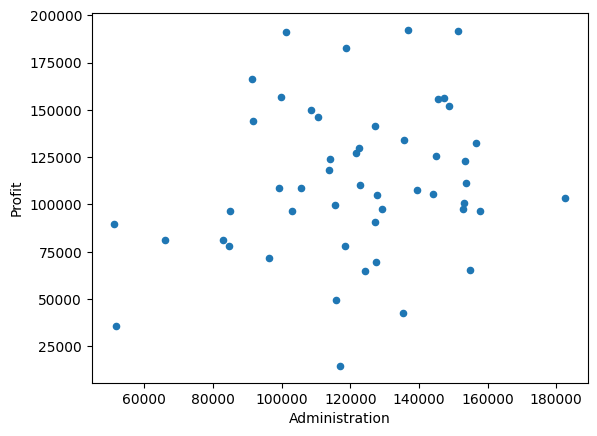

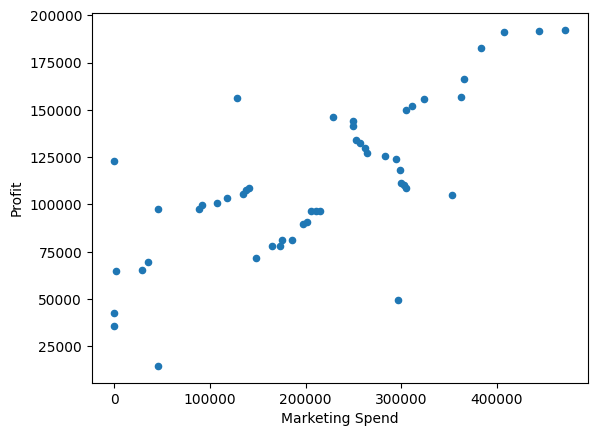

In [50]:
# Scatter Plot
df.plot(kind="scatter", x="R&D Spend", y="Profit")
plt.show()

df.plot(kind="scatter", x="Administration", y="Profit")
plt.show()

df.plot(kind="scatter", x="Marketing Spend", y="Profit")
plt.show()

In [51]:
# Assigning DV & IV
X= df[["R&D Spend"]]
y= df["Profit"]

In [52]:
# Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )


In [ ]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred= lr.predict(X_test)

In [54]:
# R-Square [Strength of the model]
r2_score(y_test, y_pred)

0.9000653083037321

In [ ]:
print(lr.intercept_)

49336.6680379911


In [ ]:
lr.predict(X[0:1])

array([190480.25107829])

In [ ]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [64]:
# Multiple linear Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Defining IV & DV
X= df[["R&D Spend","Administration","Marketing Spend"]]
y= df["Profit"]

print ("Shape of X:",X.shape)
print ("Shape of Y:",y.shape)

Shape of X: (50, 3)
Shape of Y: (50,)


In [65]:
# Assigning X & y _ Train & Test
X = X.values
y = y.values

# Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Print Split
print ("Shape of X_train:",X_train.shape)
print ("Shape of X_test:",X_test.shape)
print ("Shape of y_train:",y_train.shape)
print ("Shape of y_test:",y_test.shape)


Shape of X_train: (40, 3)
Shape of X_test: (10, 3)
Shape of y_train: (40,)
Shape of y_test: (10,)


In [66]:
mlr= LinearRegression()

# Training the model
mlr.fit(X_train,y_train)

LinearRegression()

In [67]:
# Testing the model
y_pred= mlr.predict(X_test)

In [68]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMultiple Linear Regression")
print(f" Mean Squared Error: {mse:.4f}")
print(f" R² Score: {r2:.4f}")


Multiple Linear Regression
 Mean Squared Error: 80926321.2230
 R² Score: 0.9001


In [69]:
# Intercept
print("Intercept:", mlr.intercept_)

Intercept: 54071.87574599084


In [27]:
type(mlr)

sklearn.linear_model._base.LinearRegression

In [70]:
mlr.predict(X[0:5])

array([192416.0460853 , 188349.65891895, 183278.75349458, 174025.89464521,
       173526.31060596])

In [71]:
# To check the predicted values
prediction = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
prediction.head()

,Actual,Predicted
0,134307.35,126703.027165
1,81005.76,84894.750816
2,99937.59,98893.418160
3,64926.08,46501.708150
4,125370.37,129128.397344


In [73]:
# To Save the model
import pickle
with open ('startup.pkl','wb') as f:
    pickle.dump(mlr,f)

# To load the trained model
with open('startup.pkl','rb') as f:
  pickle.load(f)